<a href="https://colab.research.google.com/github/ibrahim-manuel/cnn-models-with-tf/blob/master/Gats_and_Dogs_detection_with_augumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -o /tmp/cats_and_dogs_filtered.zip


In [ ]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'cats')

In [ ]:
train_cats_fname = os.listdir(train_cats_dir)
print(train_cats_fname[:10])

train_dogs_fname = os.listdir(train_dogs_dir)
print(train_dogs_fname[:10])

['cat.402.jpg', 'cat.166.jpg', 'cat.735.jpg', 'cat.342.jpg', 'cat.440.jpg', 'cat.363.jpg', 'cat.348.jpg', 'cat.184.jpg', 'cat.715.jpg', 'cat.730.jpg']
['dog.14.jpg', 'dog.194.jpg', 'dog.99.jpg', 'dog.989.jpg', 'dog.403.jpg', 'dog.799.jpg', 'dog.582.jpg', 'dog.588.jpg', 'dog.461.jpg', 'dog.62.jpg']


In [ ]:
print('Numero de imagens de gatos para treinamento:', len(os.listdir(train_cats_dir)))
print('Numero de imagens de cães para treinamento:', len(os.listdir(train_dogs_dir)))

print('Numero de imagens de gatos para a validação:', len(os.listdir(validation_cats_dir)))
print('Numero de imagens de cães para a validação:', len(os.listdir(validation_dogs_dir)))

Numero de imagens de gatos para treinamento: 1000
Numero de imagens de cães para treinamento: 1000
Numero de imagens de gatos para a validação: 500
Numero de imagens de cães para a validação: 500


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# configurção de como sera apresentada a nossa imagen (4x4 no nosso caso)
nrows = 4
ncols = 4

#index da imagem de onde começara a interar
img_index = 0

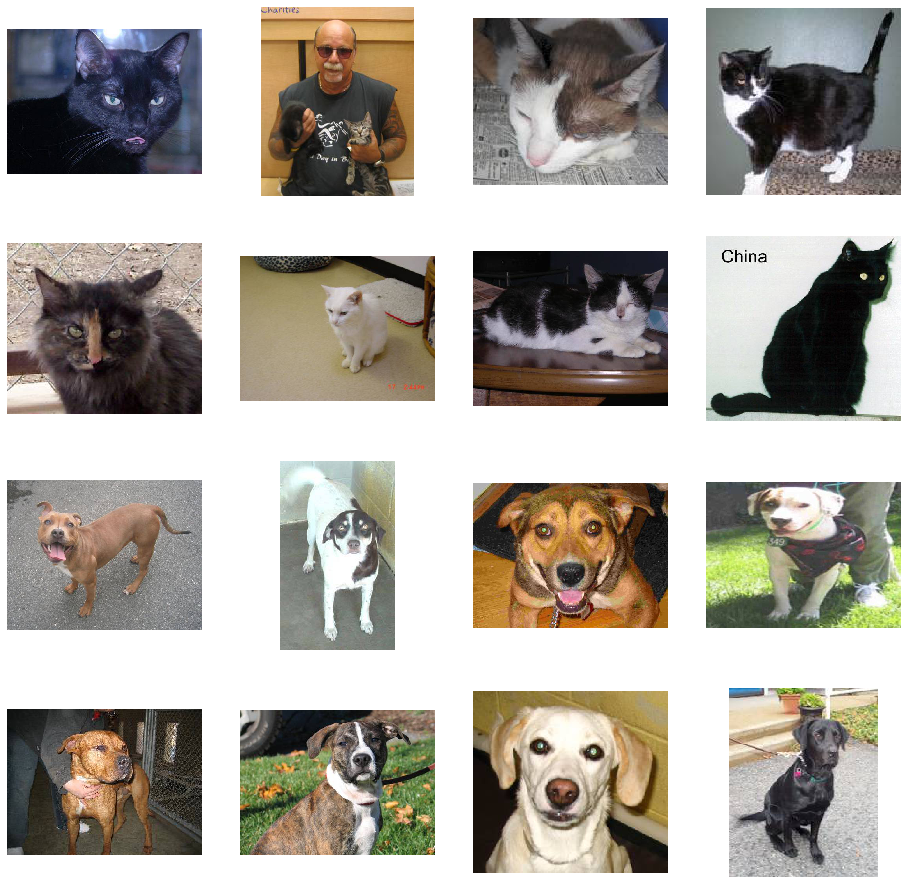

In [ ]:
# Obtendo o fig e setando a imagem para ser 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

img_index += 8

next_cat_img = [os.path.join(train_cats_dir, fname) 
                            for fname in train_cats_fname[img_index-8:img_index]]

next_dog_img = [os.path.join(train_dogs_dir, fname) 
                            for fname in train_dogs_fname[img_index-8:img_index]]


for i, img_path in enumerate(next_cat_img + next_dog_img):
  # Configurando o subplot: o index do subplot começa em 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('off') # Não mostrar exos linhas de grelhas
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
                          keras.layers.Conv2D(16, (3, 3), activation=keras.activations.relu, input_shape=(150, 150, 3)),
                          keras.layers.MaxPooling2D(2, 2),
                          keras.layers.Conv2D(32, (3, 3), activation=keras.activations.relu),
                          keras.layers.MaxPool2D(2, 2),
                          keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu),
                          keras.layers.MaxPooling2D(2, 2),
                          keras.layers.Flatten(),
                          tf.keras.layers.Dense(512, activation=keras.activations.relu),
                          tf.keras.layers.Dense(1, activation=keras.activations.sigmoid)
                          ])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
 model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Pre-processamento de dados

# todas as imagens mudarão a sua escala para 1.0/255
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True, 
                                   fill_mode = 'nearest')
test_datage  = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size=20, class_mode = 'binary')
validation_generator = test_datage.flow_from_directory(validation_dir, target_size =(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, # 2000 imagens = batch_size * steps_per_epoch
                              epochs = 60,
                              validation_data = validation_generator, 
                              validation_steps = 50, # 1000 = bath_size * validation_steps,
                              )

Epoch 1/60
100/100 [==============================] - 17s 173ms/step - loss: 0.5532 - acc: 0.7195 - val_loss: 0.5208 - val_acc: 0.7360
Epoch 2/60
100/100 [==============================] - 16s 160ms/step - loss: 0.5513 - acc: 0.7165 - val_loss: 0.5852 - val_acc: 0.6990
Epoch 3/60
100/100 [==============================] - 16s 157ms/step - loss: 0.5516 - acc: 0.7305 - val_loss: 0.5210 - val_acc: 0.7240
Epoch 4/60
100/100 [==============================] - 16s 157ms/step - loss: 0.5487 - acc: 0.7335 - val_loss: 0.5958 - val_acc: 0.7070
Epoch 5/60
100/100 [==============================] - 16s 157ms/step - loss: 0.5560 - acc: 0.7220 - val_loss: 0.5537 - val_acc: 0.6940
Epoch 6/60
100/100 [==============================] - 16s 156ms/step - loss: 0.5516 - acc: 0.7120 - val_loss: 0.5313 - val_acc: 0.7410
Epoch 7/60
100/100 [==============================] - 16s 158ms/step - loss: 0.5367 - acc: 0.7370 - val_loss: 0.5525 - val_acc: 0.7230
Epoch 8/60
100/100 [==============================] - 1